# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


# #1. A bootstrap test is appropriate and the CTL does apply. 
# #2. Null hypothesis : there is no difference in call rates or interview offers between the name categories.  Alternative hypothesis: there is a difference in call rates.

# Solution to 3 below.

In [5]:
# Your solution to Q3 here
#P value
dfw = data.loc[data['race']=='w']['call']
dfb = data.loc[data['race']=='b']['call']
obs_diff_of_mean = dfw.mean() - dfb.mean()
concat = np.concatenate((dfw, dfb))
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(concat, size=len(concat))
    bs_replicates[i] = bs_sample[:len(dfw)].mean() - bs_sample[len(dfw):].mean()
p_value = np.sum(bs_replicates >= obs_diff_of_mean)/len(bs_replicates)
print('p value is', p_value)

p value is 0.0002


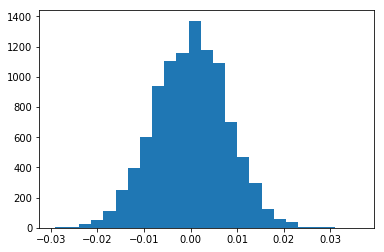

In [6]:
_ = plt.hist(bs_replicates, bins = 25)
plt.show()

In [7]:
obs_diff_of_mean

0.03203285485506058

In [8]:
bs_replicates_CI = np.empty(10000)
for i in range(10000):
    bs_replicates_CI[i] = np.random.choice(dfw,len(dfw)).mean() - np.random.choice(dfb,len(dfb)).mean()

In [9]:
# Confidence interval
con_int = np.percentile(bs_replicates_CI, [2.5, 97.5])
print('95% confidence interval is', con_int)

95% confidence interval is [0.01683778 0.04682752]


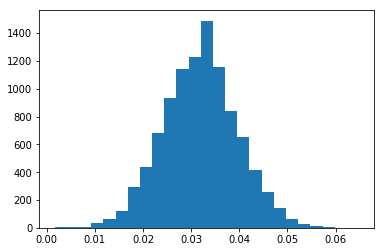

In [10]:
_ = plt.hist(bs_replicates_CI, bins=25)
plt.show()

In [11]:
# Margin of error is 0.031

In [12]:
# using t-score
import scipy.stats
scipy.stats.ttest_ind(dfw, dfb)

Ttest_indResult(statistic=4.114705290861751, pvalue=3.940802103128886e-05)


# 4. Unfortantely, it does seem that the sound of the names of the applicants do have an effect on whether or not they are called in for an interview, based off this analysis. The effects may be different if a regression were done to see the effects of the name types when other factors are controlled. 

# 5. This analysis does not mean that race is the most important factor. We would have to do an analysis that accounts for all factors relevent to whether or not an applicant is offered an interview. There  may be other factors that are more important that are not captured when considering only the type of the names. 
